# Natural Language Processing with Disaster Tweets Naive Bayes
The hypothesis is that just like in different sentiments, Fake tweets use different words than the Tweets about real disasters. <br>
The method used is from the Coursera course "Natural Language Processing with Classification and Vector Spaces".



# Import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from collections import Counter

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        print("Imports complete.")

/kaggle/input/nlp-getting-started/sample_submission.csv
Imports complete.
/kaggle/input/nlp-getting-started/train.csv
Imports complete.
/kaggle/input/nlp-getting-started/test.csv
Imports complete.


# Data

In [2]:
train = pd.read_csv("../input/nlp-getting-started/train.csv", index_col="id")
test = pd.read_csv("../input/nlp-getting-started/test.csv", index_col="id")
train

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


In [3]:
train.isna().sum()# location is missing in about 1/3, key is sometimes 

keyword       61
location    2533
text           0
target         0
dtype: int64

As this notebook is about testing, Naive Bayes and if fake Tweets use different words, I am, unsure If I want to use the location + keyword

<BarContainer object of 2 artists>

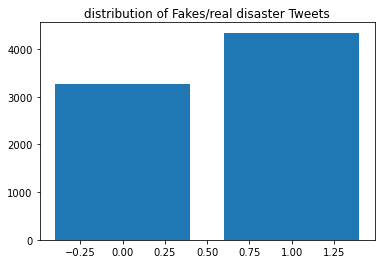

In [4]:
plt.title("distribution of Fakes/real disaster Tweets")
plt.bar(train.target.unique(),train.target.value_counts())

In [5]:
trainText=train.text.values.tolist()
testText=test.text.values.tolist()

In [6]:
stopwords_english = stopwords.words('english')

In [7]:
def process_text(text, Tokenizer):
    token = Tokenizer.tokenize(text)
    clean = []
    
    for word in token: # Go through every word in your tokens list
        if (word not in stopwords_english and  word not in string.punctuation):  
            clean.append(word)
    
    return clean

In [8]:
def countWords(text, Classes, Dict):
    tkzr= TweetTokenizer(strip_handles=True, reduce_len=True)
    
    for text, cl in zip(text, Classes):
        for word in process_text(text, tkzr):
            pair = (word, cl)
            
            if pair in Dict.keys():
                Dict[pair] +=1
            else:
                Dict[pair] =1
    
    return Dict

In [9]:
Dict = {}
Dict= countWords(trainText, train.target.values, Dict)

<BarContainer object of 97 artists>

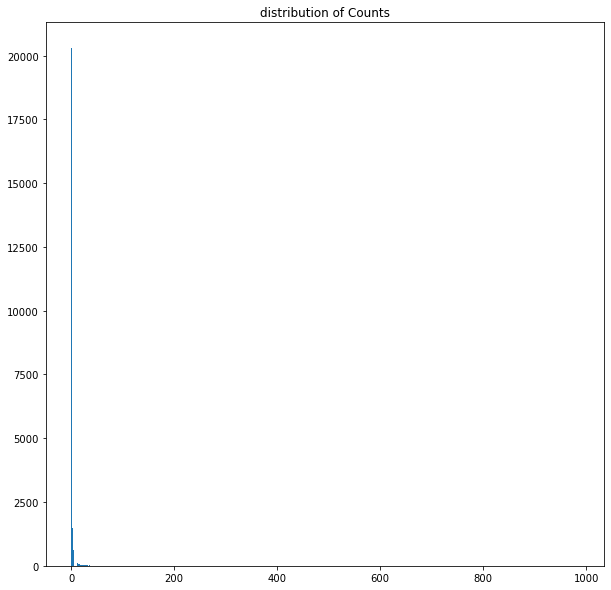

In [10]:
plt.figure(figsize=(10,10))
plt.title("distribution of Counts")
plt.bar(x=Counter(Dict.values()).keys()  ,height=Counter(Dict.values()).values())

In [11]:
Counter(Dict.values())[1]# most of the words only appear once

20296

The number of tweets is quite low, I am affraid that changing the words with an occurrence of 1 to UNK wound hurt the performance.

The original plan was to cnange these words to UNK to help the model perform versus other unknown words.

# Model

In [12]:
def CreateLikelihoods(freqs, trainX, trainY):
    loglikelihood = {}

    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)
    
    # count number of positive / negative
    CountPos = CountNeg = 0
    for pair in freqs.keys():
        if pair[1] > 0:
            CountPos += freqs[pair]

        else:
            CountNeg += freqs[pair]

    D = len(trainX)
    D_pos = np.sum(trainY) # count all "1" 
    D_neg = D- D_pos
    logprior = np.log(D_pos/D_neg)  # -0.28323932289985326


    for word in vocab:
        V=len(vocab)
        if (word,1) in freqs.keys():
            freq_pos = freqs[(word,1)]
        else:
            freq_pos = 0
            
        if (word,0) in freqs.keys():
            freq_neg = freqs[(word,0)]
        else:
            freq_neg = 0
        
        # smoothened
        p_w_pos =  (freq_pos+1)/(CountPos+V)
        p_w_neg = (freq_neg+1)/(CountNeg+V)

        loglikelihood[word] = np.log(p_w_pos/p_w_neg)

    return logprior, loglikelihood

In [13]:
logprior, loglikelihood = CreateLikelihoods(Dict, trainText, train.target.values)
logprior, loglikelihood

(-0.28323932289985326,
 {'mustard': -0.5967989084452047,
  'hitchhiking': 0.7894954526746859,
  'behaviors': 0.7894954526746859,
  'strange': -0.3091168359934239,
  'http://t.co/zZweEezJuG': 0.7894954526746859,
  '>:(': -0.5967989084452047,
  '#FunnyNews': 0.7894954526746859,
  '91': 0.7894954526746859,
  'http://t.co/Paje5mxN1z': 0.7894954526746859,
  'float': 0.09634827211474062,
  '@narendramodi': -0.5967989084452047,
  'Moments': -1.0022640165533692,
  'calif': 0.7894954526746859,
  'edit': -0.5967989084452047,
  '06JST': -1.0022640165533692,
  '#porno': -0.5967989084452047,
  'Foto': -0.5967989084452047,
  '#mufc': -1.0022640165533692,
  '17shawie': -0.5967989084452047,
  'hopes': -1.0022640165533692,
  'Freud': -0.5967989084452047,
  'spreading': 1.1949605607828502,
  'OFF': 0.7894954526746859,
  'expose': -0.5967989084452047,
  '#WORSTSUMMERJOB': -0.5967989084452047,
  'opinionated': -0.5967989084452047,
  'interview': -0.5967989084452047,
  'http://t.co/Y7PetO0DX2': -0.59679890

In [14]:
def naiveBayesPredict(tweet, logprior, loglikelihood):
    tkzr= TweetTokenizer(strip_handles=True, reduce_len=True)
    word_l = process_text(tweet, tkzr)

    p = 0
    p += logprior  

    for word in word_l:
        if word in loglikelihood:
            p += loglikelihood[word]

    return p

In [15]:
def testNaiveBayes(test_x, test_y, logprior, loglikelihood):
    accuracy = 0  

    y_hats = []
    for tweet in test_x:
        if naiveBayesPredict(tweet, logprior, loglikelihood) > 0:
            y_hat_i = 1
        else:
            y_hat_i = 0

        y_hats.append(y_hat_i)

    compare = y_hats!=test_y
    error = np.count_nonzero(compare == True)/len(compare)
    
    accuracy = 1- error
    
    return accuracy

In [16]:
print("Naive Bayes accuracy = ",(testNaiveBayes(trainText, train.target.values, logprior, loglikelihood)))

Naive Bayes accuracy =  0.9230264022067516


**end base method**


add keyword... information

In [17]:
def countOther(clss, Classes, Dict):
    for cls, cl in zip(clss, Classes):
        pair = (cls, cl)
        if pair in Dict.keys():
            Dict[pair] +=1
        else:
            Dict[pair] =1
    
    return Dict

In [18]:
DictKey = {}
DictKey= countOther(train.keyword, train.target.values, Dict)
DictLoc = {}
DictLoc= countOther(train.location, train.target.values, Dict)

In [19]:
# the Logpriors are not used here, because they are already accounted for in the base version
logpriorUseless, loglikelihoodKey= CreateLikelihoods(DictKey, train.keyword, train.target.values)
logpriorUseless, loglikelihoodLoc= CreateLikelihoods(DictLoc, train.location, train.target.values)

In [20]:
def AddLikelihoods(key, loc, loglikelihoodKey, loglikelihoodLoc):
    p=0
    p+= loglikelihoodKey.get(key,0)
    p+= loglikelihoodLoc.get(loc,0)
    return p

In [21]:
sol=[]
# for text in testText:
#     if naiveBayesPredict(text, logprior, loglikelihood) >0:
#         sol.append(1)
#     else:
#         sol.append(0)

for i in range(len(testText)):
    if ((naiveBayesPredict(testText[i], logprior, loglikelihood))+
       AddLikelihoods(test.iloc[i]["keyword"], test.iloc[i]["location"], loglikelihoodKey, loglikelihoodLoc)) >0:
        sol.append(1)
    else:
        sol.append(0)

In [22]:
Counter(sol)

Counter({1: 1239, 0: 2024})

In [23]:
test["target"]=sol
sub=test[["target"]]
sub

,target
id,
0,1
2,1
3,1
9,1
11,1
...,...
10861,0
10865,1
10868,1


In [24]:
submission=sub.to_csv("submission1.csv",index=True)
submission

Notes:
- base model with only considering the text got 0.79711acc. this was a positive surprise that such a simple model performed better than half of the participants

- 0.79865acc. after adding the probabilities of the location and keywords
